# 911 Data Project
## Since approximately Sept. 2017, I have developed a database of 3.7 million 911 calls in Bucks County, Pennsylvania. 
## The data was obtained through a series of Right to Know Law requests to the county's Department of Emergency Communications. The data was provided in a .TXT file format, and parsed into a .CSV format using a script written with Python.
## This is an example of Micro Data used for analysis in our newsroom. We cannot control how the data was initially collected by the 911 dispatch center, but we can analyze every call from that point.
## Let's dive in.

In [1]:
import pandas as pd

In [2]:
all_calls=pd.read_csv("main_calls_1.csv")

/Users/ulleryc/journalism-class/j-fsu/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
all_calls

,incident_number,incident_type,location,location2,towns,police_dept,ems_squads,ems_blk,fire_blk,police_blk,date,time,response_time,transport_time,total_time,ems_call
0,ED1200001,CHEST PAIN / CARDIAC SYMPTOMS,"CHESTERFIELD APTS #P ,44","at 1338 VETERANS HY #P ,44",middletown township,Middletown Township,Penndel-Middletown Emergency Squad,168709,7015,44459,2012-01-01,00:09:00,4.0,NaN,27.0,EMS
1,ED1200002,ABDOMINAL/BACK PAIN/NAUSEA,"2227 PILEGGI DR #A ,75",NaN,warrington township,Warrington Township,Warrington Community Ambulance Corps,129013,29048,75201,2012-01-01,00:12:00,4.0,9.0,23.0,EMS
2,ED1200003,CHEST PAIN / CARDIAC SYMPTOMS,"TWINING VILL HEALT #801 ,54","at 280 MIDDLE HOLLAND RD #801 ,54",northampton township,Northampton Township,Tri-Hampton Rescue,115702,73368,54320,2012-01-01,00:16:00,3.0,21.0,48.0,EMS
3,ED1200004,SYNCOPAL EPISODE (SYNCOPE),"GERMAN HUNGARIAN C ,22","at 4666 BRISTOL RD ,22",bensalem township,Bensalem Township,Bensalem EMS,186506,84006,22106,2012-01-01,00:17:00,10.0,NaN,36.0,EMS
4,ED1200005,NON-SPECIFIC (CRITICAL) EMERG,"2393 BLACKRIVER RD,,LOWER SAUCON",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,00:25:00,16.0,14.0,48.0,EMS
5,ED1200006,AUTO EXTRICATION (RBOX),"CHECKERS ,44","at 1140 S WOODBOURNE RD ,44",middletown township,Middletown Township,Penndel-Middletown Emergency Squad,168627,77034,44370,2012-01-01,00:31:00,0.0,9.0,37.0,EMS
6,ED1200007,OVERDOSE/POISIONING (CRITICAL),"2 RUSSET LA ,25",NaN,bristol township,Bristol Township,Levittown-Fairless Hills Rescue Squad,154108,13008,25505,2012-01-01,00:34:00,7.0,7.0,39.0,EMS
7,ED1200008,ABDOMINAL/BACK PAIN/NAUSEA,"WESTMINSTER APTS #E60 ,75","at 600 VALLEY RD #E60 ,75",warrington township,Warrington Township,Warrington Community Ambulance Corps,129021,29505,75101,2012-01-01,00:35:00,8.0,13.0,47.0,EMS
8,ED1200009,PSYCHIATRIC EMERGENCY,"LAKEVIEW TERR C ,34","at 251 S OLDS BL ,34",falls township,Falls Township,Levittown-Fairless Hills Rescue Squad,154013,31040,34317,2012-01-01,00:37:00,9.0,18.0,45.0,EMS
9,ED1200010,UNKNOWN EMERGENCY (3RD PARTY),"NORTH DR/ZINNIA DR ,52",NaN,newtown township,Newtown Township,Newtown Volunteer Ambulance Corps,145024,55035,52002,2012-01-01,00:46:00,10.0,NaN,15.0,EMS


In [4]:
all_calls.shape

(3743691, 16)

## Every call has an incident number, a call type, at least one address location, a town, the police department jurisdiction, the EMS squad jurisdiction, three "block" location identifiers, date, time, response, transport and total time. The "ems_call" column notes if it was a police or EMS call.
## With this database, I can tell you a lot about 911 calls in the county between Jan. 1, 2012 through Oct. 31, 2018. 
## Let's start with the basic questions, and we'll do some visualization on the way. 
# First question: what are the 10 the most common police calls?
## We'll do this as a list and as a bar chart using matplotlib.

In [5]:
import matplotlib
%matplotlib inline

In [6]:
police_calls=all_calls[all_calls.ems_call=='Police']

In [7]:
police_calls.incident_type.value_counts().head(10)

TRAFFIC STOP                   513676
PHONE MESSAGE                  268368
ALARM SYSTEM                   193080
TRAFFIC ACCIDENT               142476
CIVIL PROBLEM                  130003
PREMISE CHECK                  125014
MEET OFFICER                    96275
NO VOICE CONTACT 9-1-1 CALL     93220
FOLLOW UP INVESTIGATION         91676
ABANDONED 9-1-1 CALL            72747
Name: incident_type, dtype: int64

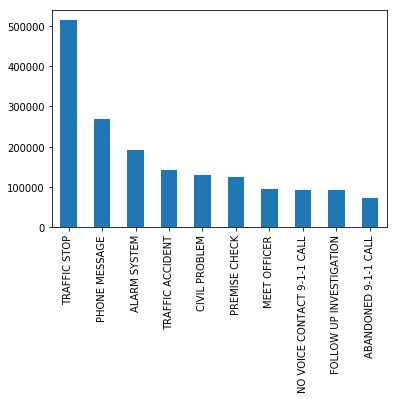

In [8]:
police_calls.incident_type.value_counts().head(10).plot.bar()

## This was incredibly interesting to see the first time I checked. I was expecting "emergencies" to pop up at the top of the list. Traffic stops far outnumber any other single call, and phone messages are kind of a misc. category. 
## Not only are there more than a half million traffic stops in this data, things like robberies or assaults don't even appear in the top 10. 
## So what does this tell us? It tells us there's a lot more information than just life-or-death situations here. It tells us the dispatch center also handles at least some portion of the more operational functions of local police. 
## The same won't necessarily be true of EMS calls, however, as I've found their numbers to be more what I expected.

In [9]:
ems_calls=all_calls[all_calls.ems_call=='EMS']

In [10]:
ems_calls.incident_type.value_counts().head(10)

RESPIRATORY DISTRESS              33629
EMERGENCY TRANSPORTATION          32092
FALL VICTIM (NON-CRITICAL)        28440
CHEST PAIN / CARDIAC SYMPTOMS     25837
NON-SPECIFIC (CRITICAL) EMERG     25009
SYNCOPAL EPISODE (SYNCOPE)        21556
ASSIST PATIENT                    16238
TRAFFIC ACCIDENT(NON-CRITICAL)    13432
FALL VICTIM (CRITICAL)            12558
SEIZURE/ACTIVE (MEDIC)            11707
Name: incident_type, dtype: int64

# Okay, so let's get back to police. We know Traffic stops occur the most, so where do they occur the most?
## For this, a bar chart is okay, but we really want a map. For that, we'll use a module called geopandas and a shape file provided online by Bucks County. I've already cleaned up the municipal map some to make this easier. It includes population and square mile estimates, and I'm going to leave those in for now.

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [12]:
towns1=gpd.read_file("towns1.rar/towns1.shp")

In [13]:
towns1

,towns,population,fips_sq_mi,geometry
0,upper makefield township,8190.0,21.82,POLYGON ((-74.91426302000026 40.26298903436477...
1,sellersville borough,4249.0,1.17,"POLYGON ((-75.32231815707847 40.3630725648114,..."
2,bensalem township,60427.0,20.93,"POLYGON ((-74.99165894397615 40.1344050248029,..."
3,richlandtown borough,1327.0,0.26,POLYGON ((-75.31893622586787 40.47907161861421...
4,riegelsville borough,868.0,1.09,POLYGON ((-75.19129083063962 40.58570594796645...
5,nockamixon township,3441.0,22.38,POLYGON ((-75.15062533652618 40.57085684335124...
6,falls township,34300.0,26.60,(POLYGON ((-74.80029354941779 40.2087775333423...
7,haycock township,2225.0,20.87,POLYGON ((-75.30025923014693 40.49346657710261...
8,lower southampton township,18909.0,6.70,"POLYGON ((-74.9987624830945 40.17146875664378,..."
9,middletown township,45436.0,19.32,POLYGON ((-74.89866034347483 40.13231997125762...


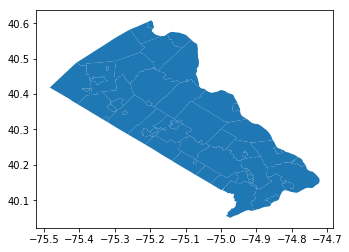

In [14]:
towns1.plot()

# Merging pandas dataframes with geopandas geodataframes
## We could just merge this map with the 911 data now, but that would be really be overkill right now. 
## We just want to know how many traffic stops occured in which towns over all years, and then assign that number to the map. 
## We'll need to do a merge, but first we need to make a new dataframe from the traffic stops. This is pretty easily done with what we've already discussed. We'll just add a few more functions.

In [20]:
p_call_counts=police_calls.groupby('towns').incident_type.value_counts().to_frame().rename(columns={'incident_type':'type_calls'}).reset_index()

In [21]:
p_call_counts

,towns,incident_type,type_calls
0,bedminster township,TRAFFIC STOP,3513
1,bedminster township,ALARM SYSTEM,1679
2,bedminster township,PHONE MESSAGE,1375
3,bedminster township,CIVIL PROBLEM,1307
4,bedminster township,TRAFFIC ACCIDENT,685
5,bedminster township,NO VOICE CONTACT 9-1-1 CALL,561
6,bedminster township,ANIMAL COMPLAINT,555
7,bedminster township,FOLLOW UP INVESTIGATION,525
8,bedminster township,ABANDONED 9-1-1 CALL,401
9,bedminster township,DISABLED MOTORIST,363


## We now have a dataframe for the number of each call in each town. Now we'll filter this down to just traffic stops and save that as it's own variable.

In [23]:
traffic_stops=p_call_counts[p_call_counts.incident_type=='TRAFFIC STOP']

In [24]:
traffic_stops

,towns,incident_type,type_calls
0,bedminster township,TRAFFIC STOP,3513
190,bensalem township,TRAFFIC STOP,56031
441,bridgeton township,TRAFFIC STOP,27
570,bristol borough,TRAFFIC STOP,3676
780,bristol township,TRAFFIC STOP,16400
1014,buckingham township,TRAFFIC STOP,6643
1223,chalfont borough,TRAFFIC STOP,4099
1397,doylestown borough,TRAFFIC STOP,9799
1601,doylestown township,TRAFFIC STOP,14748
1817,dublin borough,TRAFFIC STOP,1325


## A couple quick points about data merges like these. All merges are using Pandas' merge function. Merge's can only work if two dataframes share a column and you're looking for shared values in those columns. We'll merge on the towns columns, but this is case sensitive. I've already cleaned this data, but keep in mind the values will only merge if they are exactly the same. Also, keep GEODATA to the left. Otherwise, you'll end up with just a regular dataframe.
## That last part's kind of technical, and only relevant to maps.

In [28]:
pd.merge(towns1, traffic_stops,on='towns')

,towns,population,fips_sq_mi,geometry,incident_type,type_calls
0,upper makefield township,8190.0,21.82,POLYGON ((-74.91426302000026 40.26298903436477...,TRAFFIC STOP,2172
1,sellersville borough,4249.0,1.17,"POLYGON ((-75.32231815707847 40.3630725648114,...",TRAFFIC STOP,2605
2,bensalem township,60427.0,20.93,"POLYGON ((-74.99165894397615 40.1344050248029,...",TRAFFIC STOP,56031
3,richlandtown borough,1327.0,0.26,POLYGON ((-75.31893622586787 40.47907161861421...,TRAFFIC STOP,20
4,riegelsville borough,868.0,1.09,POLYGON ((-75.19129083063962 40.58570594796645...,TRAFFIC STOP,10
5,nockamixon township,3441.0,22.38,POLYGON ((-75.15062533652618 40.57085684335124...,TRAFFIC STOP,206
6,falls township,34300.0,26.60,(POLYGON ((-74.80029354941779 40.2087775333423...,TRAFFIC STOP,20352
7,haycock township,2225.0,20.87,POLYGON ((-75.30025923014693 40.49346657710261...,TRAFFIC STOP,69
8,lower southampton township,18909.0,6.70,"POLYGON ((-74.9987624830945 40.17146875664378,...",TRAFFIC STOP,14022
9,middletown township,45436.0,19.32,POLYGON ((-74.89866034347483 40.13231997125762...,TRAFFIC STOP,20306


## merge looks good, let's plot.

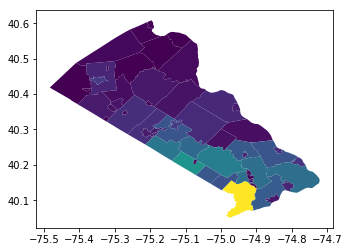

In [32]:
pd.merge(towns1, traffic_stops,on='towns').plot(column='type_calls')

## ... and again with some more advanced commands.

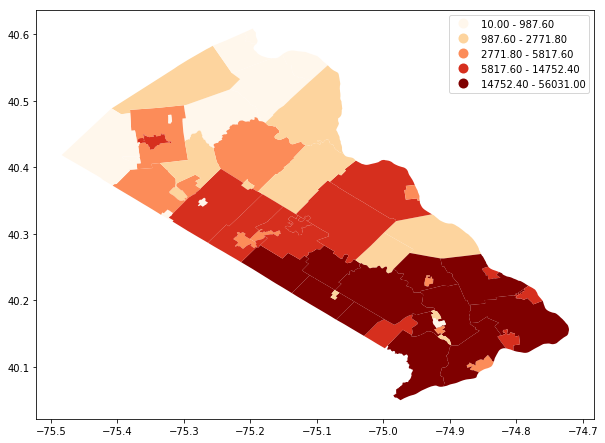

In [44]:
pd.merge(towns1, traffic_stops,on='towns').plot(column='type_calls',cmap='OrRd',scheme='quantiles',legend=True, figsize=(10,10))

## So, we can see that lower Bucks County has significantly more traffic stops than upper Bucks County. There's a thousand questions you could ask to follow up, and that's a good segue to something really important about data journalism.

# Treat your data like a person: a dataframe will never volunteer information, so ask it questions.
## You'll probably come across people in your newsroom who don't think data can tell you much. I think part of the issue is because data is often a strong tool in fact checking. When you get comfortable thinking of something that confirms an answer, it's easy not to associate with asking the questons to begin with.
## Data can play such a strong role in your storytelling though, but don't rely on only one source. As with any story, you don't want to talk to just one person.
## Take the 911 data, for example. If it were a person, they could tell us a lot about the calls, but not about the areas. Census data can tell us so much more about the area's demographics. A database of municipal police spending could tell us what towns spend the most on their police forces, and how that spending compares to other communities. 
## Datasets don't have to have a sole, single-story purpose either. As a data journalist, I often want to have more information than I could possibly need. 
## This 911 data has popped up in several stories over the past year, and that's all the result in the work leading up to a full series on it.
## Keeping voter turnout and registration data updated will be something your entire newsroom could use. If you're in a state that expanded its gambling laws somewhat recently, keeping databases on revenues and expenses at a state or county level is going to come in handy.
## By utilizing tools like Python, you can not only create and maintain these databases, you can automate the process.
## That's a little more complicated of a process than this extensive overview, though.